In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *
from scipy import stats

In [2]:
mu = 0.0
sigma = 0.2
num = 10_000_000

data = pd.DataFrame({'W' : np.random.gumbel(mu, sigma, num),
                     'y' : np.random.normal(mu, 0.1, num),
                     'z' : np.random.normal(0.5, 0.5, num)})

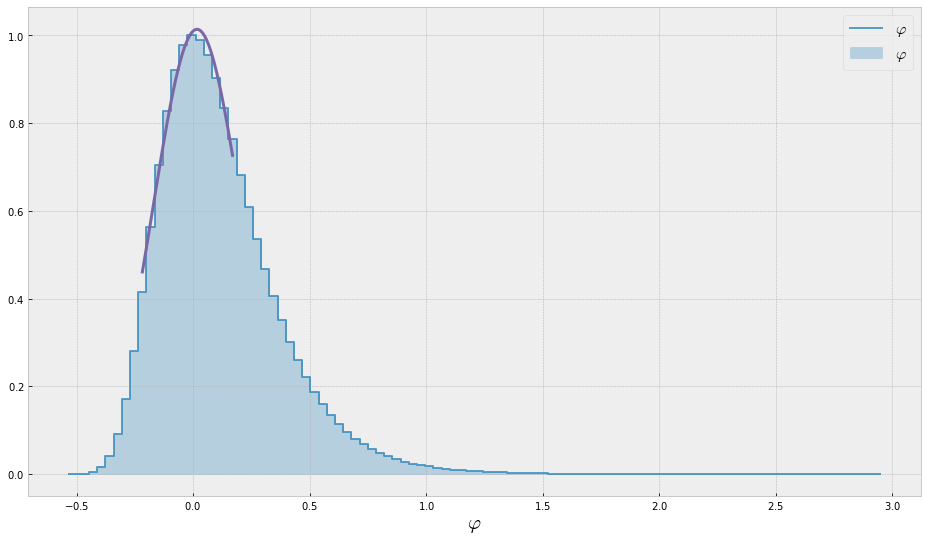

In [3]:
testHist = Hist1D(data=data.W, name="$\\varphi$")

testHist.histogram(fill_alpha=0.3)
testHist.fitGaussian(fit_range=[-0.2, 0.2])

0.00022366988155264752


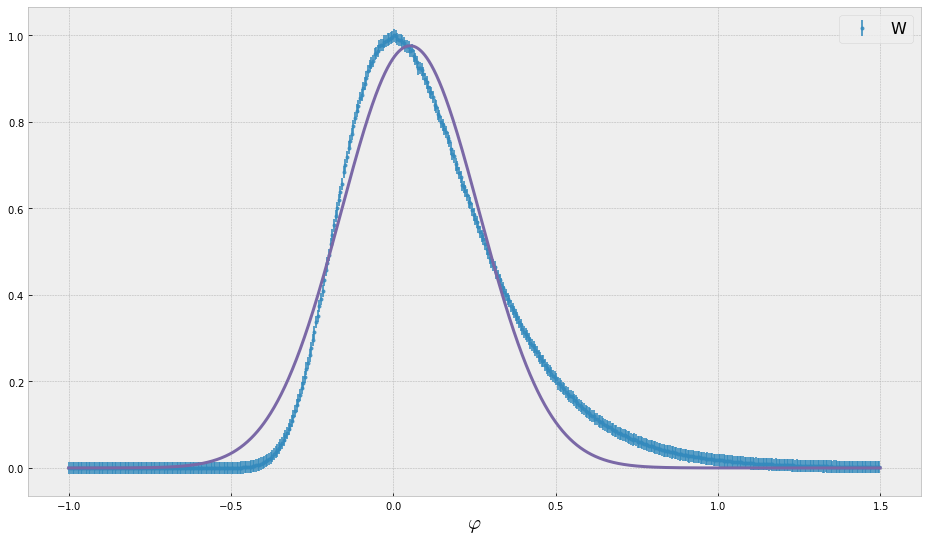

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
testHist = Hist1D(data=data.W, bins=500, name="$\\varphi$", xrange=[-1.0, 1.5])
testHist.fill(data.W)

testHist.errorbar()
# testHist.errorbar(errorcalc=np.std)
# testHist.errorbar(errorcalc=np.var)


print(np.sqrt(testHist.data.sum())/testHist.data.sum())

# ## Create errorbar function and use it
# def myErrorFunc(y):
#     return np.sqrt(1/np.sqrt(np.sum(y)))
# testHist.errorbar(errorcalc=myErrorFunc, color='g')

# ## Use lambda function
# testHist.errorbar(errorcalc=lambda y: np.sqrt(1/y.size), color='r')

# ## Use numbers or an array of length == bins
# testHist.errorbar(errorcalc=0.03, color='b')
# testHist.errorbar(errorcalc=np.random.normal(0.05, 0.01, 250), color='b')


testHist.fitGaussian()

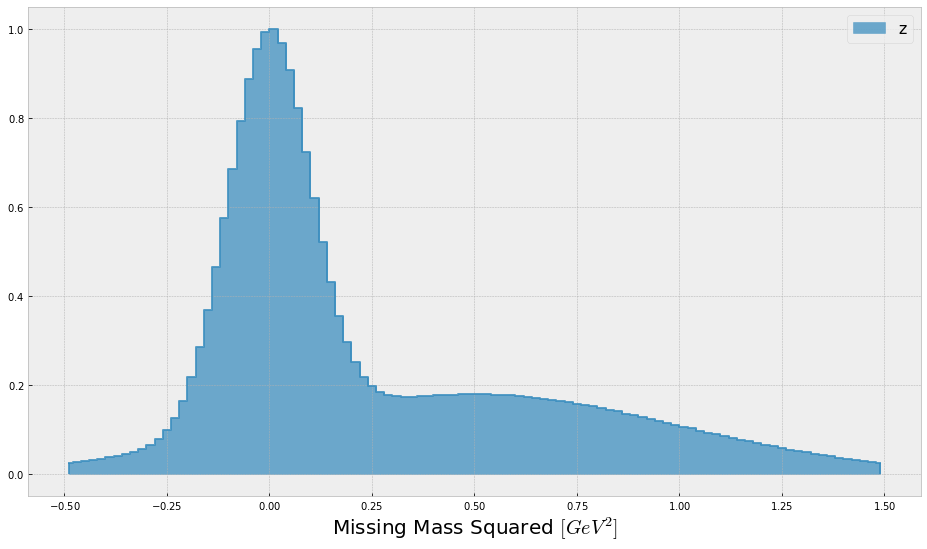

In [5]:
testHist2 = Hist1D(xrange=[-0.5, 1.5], bins=100, name='Missing Mass Squared $[GeV^2]$')
testHist2.fill(data.y)
testHist2.fill(data.z)
testHist2.histogram(filled=True)

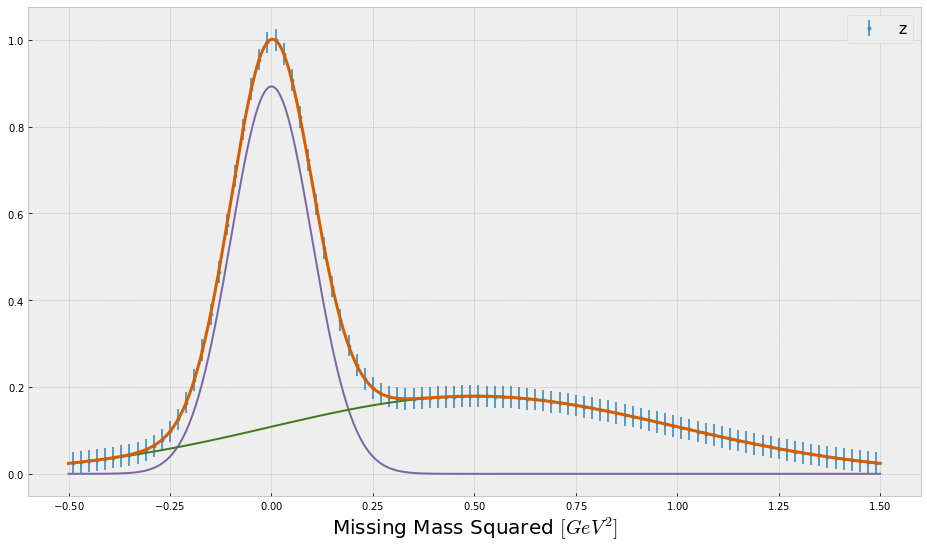

In [6]:
testHist2.histogram(ax, filled=True)

gauss1 = GaussianModel(prefix='g1_')
pars = gauss1.guess(testHist2.y, x=testHist2.x)

pars['g1_center'].set(value=0.0)
pars['g1_sigma'].set(value=0.2)


gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=-0.3)
pars['g2_sigma'].set(value=0.5)


mod = gauss1 + gauss2

testHist2.errorbar()
testHist2.customModel(mod, params=pars)


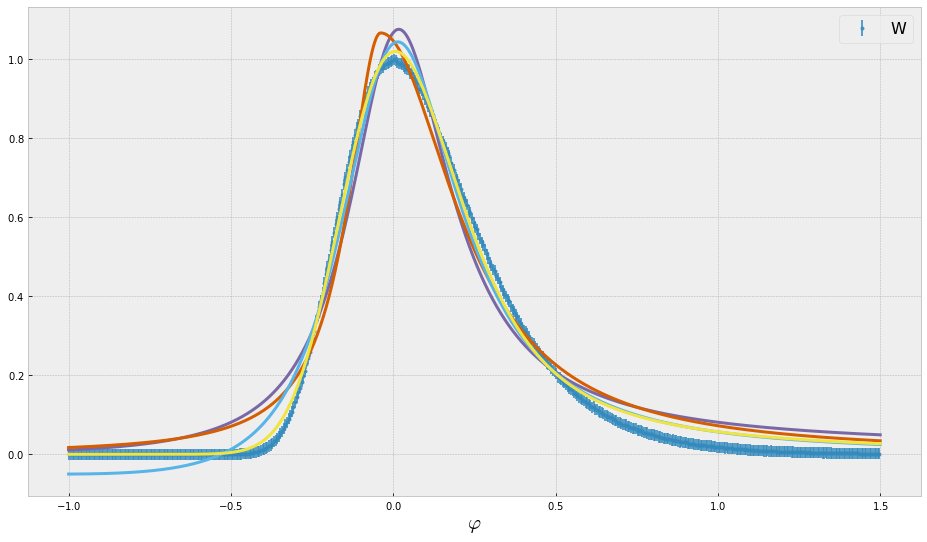

In [7]:
testHist.errorbar()
testHist.fitBreitWigner()
testHist.fitSplitLorentzian()
testHist.fitDonaich()
testHist.fitSkewedVoigt();